# Python & Data Science practical exercises 3

## Visualisation

Follow the instructions to complete each of these tasks. This set of exercises focusses on visualising data with pandas, matplotlib or seaborn. Do not worry if you do not complete them all in the timetabled practical session.

**Questions marked with a * are extra challenging**

The relevant material for these exercises is in lectures 6-8.

This is not assessed but will help you gain practical experience for the exam and coursework.

*Feel free to work on them in any order, and focus on the ones you find most challening or interesting!*

Use this notebook to practice visualising data in Python. Use whichever plotting framework you prefer, and perhaps experiment with using pandas, matplotlib or seaborn. You will need to download the data files from the module blackboard
and place them in the same directory as this notebook.

For seaborn you can find many examples of different types of plot here:
https://seaborn.pydata.org/tutorial.html

In [1]:
%matplotlib inline
# You can also use %matplotlib notebook to get an interactive display
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize
import requests

## 1.1

Load the economicsLong.csv file as a pandas data frame, and use pandas to create a line plot of each variable over time.

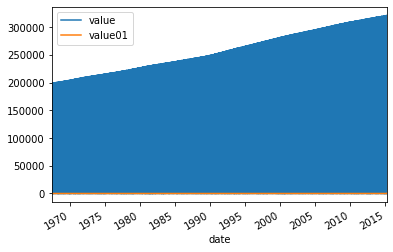

In [2]:
ELdata = pd.read_csv('economicsLong.csv')
#ELdata
del ELdata['variable']
del ELdata['Unnamed: 0']
ELdata['date'] =pd.to_datetime(ELdata.date)
#ELdata
ELdata.plot(x='date')#Looks ok-ish

## 1.2

Create a bar plot showing the mean number of available bikes in each zip code in the bikes data.

In [3]:
# Load the bikes data
indego_bikes_url = ("https://www.rideindego.com/stations/json/")
headers = {'User-Agent': "Mozilla/5.0 (Macintosh; Intel Mac OS X 10.13; rv:63.0) Gecko/20100101 Firefox/63.0"}
indego_bikes_data = requests.get(indego_bikes_url,headers=headers)
bikes = json_normalize(indego_bikes_data.json()['features'])
bikes.head()

,type,geometry.coordinates,geometry.type,properties.addressStreet,properties.addressCity,properties.addressState,properties.addressZipCode,properties.bikesAvailable,properties.closeTime,properties.docksAvailable,...,properties.kioskConnectionStatus,properties.kioskType,properties.latitude,properties.longitude,properties.hasGeofence,properties.classicBikesAvailable,properties.smartBikesAvailable,properties.electricBikesAvailable,properties.isArchived,properties.potentialDocksAvailable
0,Feature,"[-75.16374, 39.95378]",Point,1401 John F. Kennedy Blvd.,Philadelphia,PA,19102,15,03:55:00,15,...,Active,1,39.95378,-75.16374,False,10,0,4,False,NaN
1,Feature,"[-75.14403, 39.94733]",Point,191 S. 2nd St.,Philadelphia,PA,19106,6,03:55:00,7,...,Active,1,39.94733,-75.14403,False,6,0,0,False,NaN
2,Feature,"[-75.20311, 39.9522]",Point,246 S. 40th St.,Philadelphia,PA,19104,3,03:55:00,14,...,Active,1,39.95220,-75.20311,False,3,0,0,False,NaN
3,Feature,"[-75.15993, 39.94517]",Point,328 S. 11th St.,Philadelphia,PA,19107,1,03:55:00,18,...,Active,1,39.94517,-75.15993,False,1,0,0,False,NaN
4,Feature,"[-75.15055, 39.98078]",Point,1076 Berks Street,Philadelphia,PA,19122,13,03:55:00,6,...,Active,1,39.98078,-75.15055,False,13,0,0,False,NaN


Text(0.5, 1.0, 'Mean of Avialable Bikes in Each Zip Code')

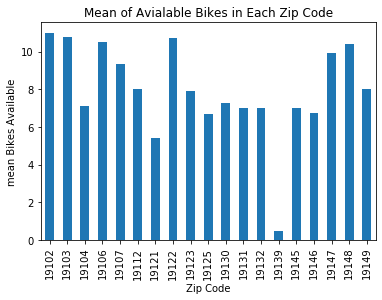

In [4]:
Bplot = bikes.groupby('properties.addressZipCode')['properties.bikesAvailable'].mean().plot(kind='bar')
Bplot.set_xlabel("Zip Code")
Bplot.set_ylabel("mean Bikes Available")
Bplot.set_title("Mean of Avialable Bikes in Each Zip Code")

## 1.3

Load the iris.csv data and create a box and whisker plot showing the distribution of sepal length for each of the three species.

Species
setosa        AxesSubplot(0.125,0.125;0.775x0.755)
versicolor    AxesSubplot(0.125,0.125;0.775x0.755)
virginica     AxesSubplot(0.125,0.125;0.775x0.755)
Name: Sepal.Length, dtype: object

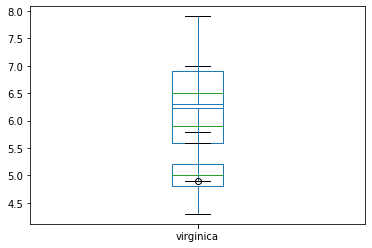

In [18]:
irdata = pd.read_csv('iris.csv')
irdata = irdata.groupby('Species')
irdata['Sepal.Length'].plot(kind='box')#All together in same plot (It is messy)
###Seperate plots for each species are below###Execute individually
#irdata['Sepal.Length'].get_group('setosa').plot(kind='box')
#irdata['Sepal.Length'].get_group('versicolor').plot(kind='box')
#irdata['Sepal.Length'].get_group('virginica').plot(kind='box')

## 1.4

Look at the faithful.csv data, which gives a list of eruptions of a geyser in Yellowstone national park in the USA. The eruptions variable gives the length of the eruption, while the waiting variable gives the waiting time until the next eruption.

Explore the data by looking at the distribution of the two variables, and how they vary together. What do you notice about the distribution of the individual variables, and how they are related?

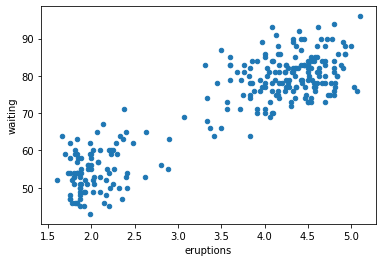

In [22]:
ffdata = pd.read_csv('faithful.csv')
##All types of graphs testing below
#ffdata.plot(x='eruptions', y='waiting')# bad line graph
ffdata.plot(kind='scatter', x='eruptions', y='waiting')# Best plot: scatter graph
#ffdata.plot(kind='kde', x='eruptions', y='waiting')# kde graph is ok for one variable
#ffdata.plot(kind='area', x='eruptions', y='waiting')#area graph not suitable for data
#ffdata.plot(kind='hexbin', x='eruptions', y='waiting')# hexagonal bin plot graph not great
#ffdata.plot(kind='hist', x='eruptions', y='waiting')# better scatter graph not useful
#ffdata.plot(kind='pie', x='eruptions', y='waiting')# better pie graph not useful
###The scatter plot shows some possible correlation between wating time and the height of eruption

## 1.5

Experiment with plotting the diamonds.csv data using matplotlib and seaborn to explore how depth and table relate to cut.

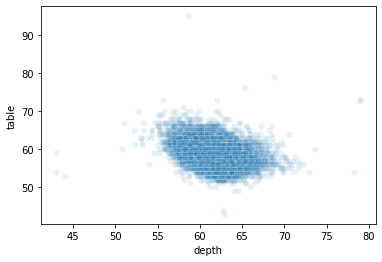

In [42]:
#Since pandas plot uses matplotlib, I will use pandas's plot function
ddata = pd.read_csv('diamonds.csv')
#ddata.plot(kind='line', x='depth', y='table')# bad plot
#ddata.plot(kind='scatter', x='depth', y='table')# ok but doesn't tell much
sns.scatterplot(x='depth', y='table', data=ddata, alpha=0.1)#Slightly better than standard scatter plot, shows density of points
#sns.kdeplot(ddata.depth, ddata.table)#doesn't work, too long to plot

## 1.6

The longley.csv data set contains several economical variables measured over several years. The variables are:

 - GNP.deflator: GNP implicit price deflator (a measure of inflation)
 - GNP: Gross National Product.
 - Unemployed: number of unemployed.
 - Armed.Forces: number of people in the armed forces.
 - Population: population with age older than 14.
 - Year: the year
 - Employed: number of people employed.
 
Explore the data and find which variables appear to be related.

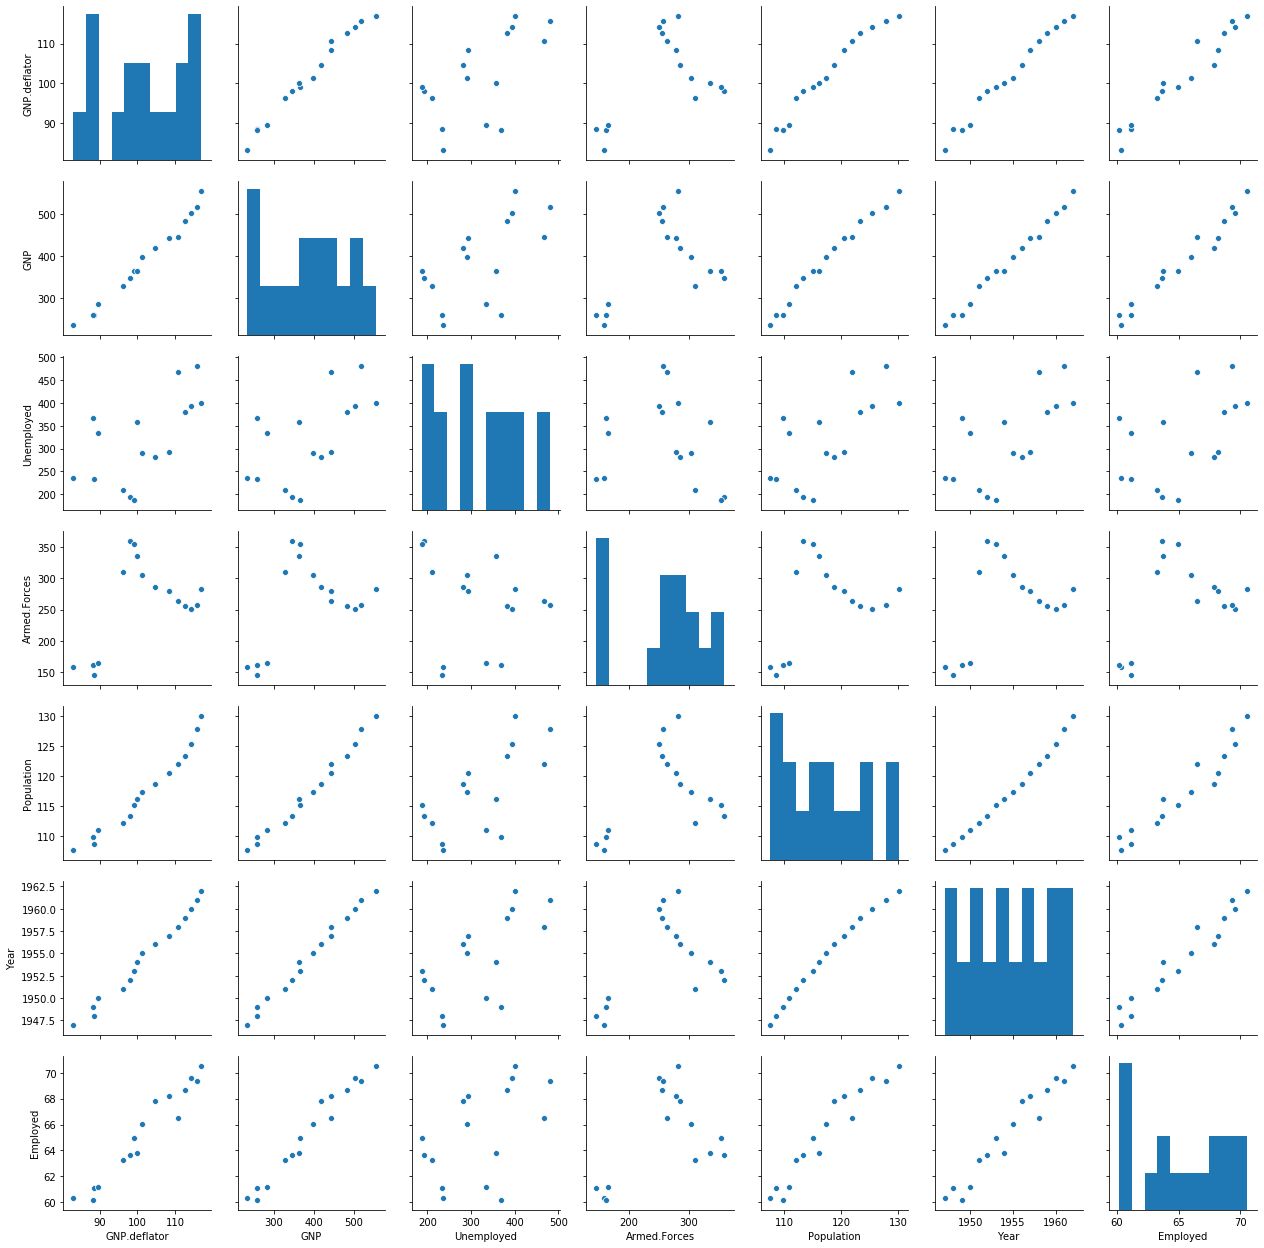

In [44]:
lldata = pd.read_csv('longley.csv')
sns.pairplot(lldata)# good approach, takes a while to compute
##GNP.deflator and GNP: positive correlation
##GNP(same with GNP.deflator) and Population: positive correlation
##GNP(same with GNP.deflator) and Year: positive correlation
##GNP(same with GNP.deflator) and Employed: positive correlation
##Population and Year: Positive Correlation
##Population and Employed: Positive correlation
##Employed and Year: Positive correlation
##Other graphs are either scattered or have some sort of different form/shapes that don't indicate a clear correlation 